In [1]:
"""
Conclusion
- Time derivative velocity max: 14mm/s
- Gradient velocity max: 12mm/s
- Average velocity over one second during RPM acceleration: 7mm/s
"""

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from datetime import datetime
import sys
import os

In [2]:
files = [] # get filepaths

for i, file in enumerate(os.listdir(os.getcwd())):
    if file.endswith(".csv"):
        files.append(file)
        
files

['filteredFromMatlabRun6.csv']

   Time (s)  Displacement (mm)  Velocity Gradient  Velocity Derivative
0    4.0000          -0.051103          -2.089940                  NaN
1    4.0167          -0.086005          -0.287676            -2.089940
2    4.0333          -0.061042           0.911317             1.503795
3    4.0500          -0.055777           1.422365             0.315269
4    4.0667          -0.013535           1.381245             2.529461
Permission error! Is file open?


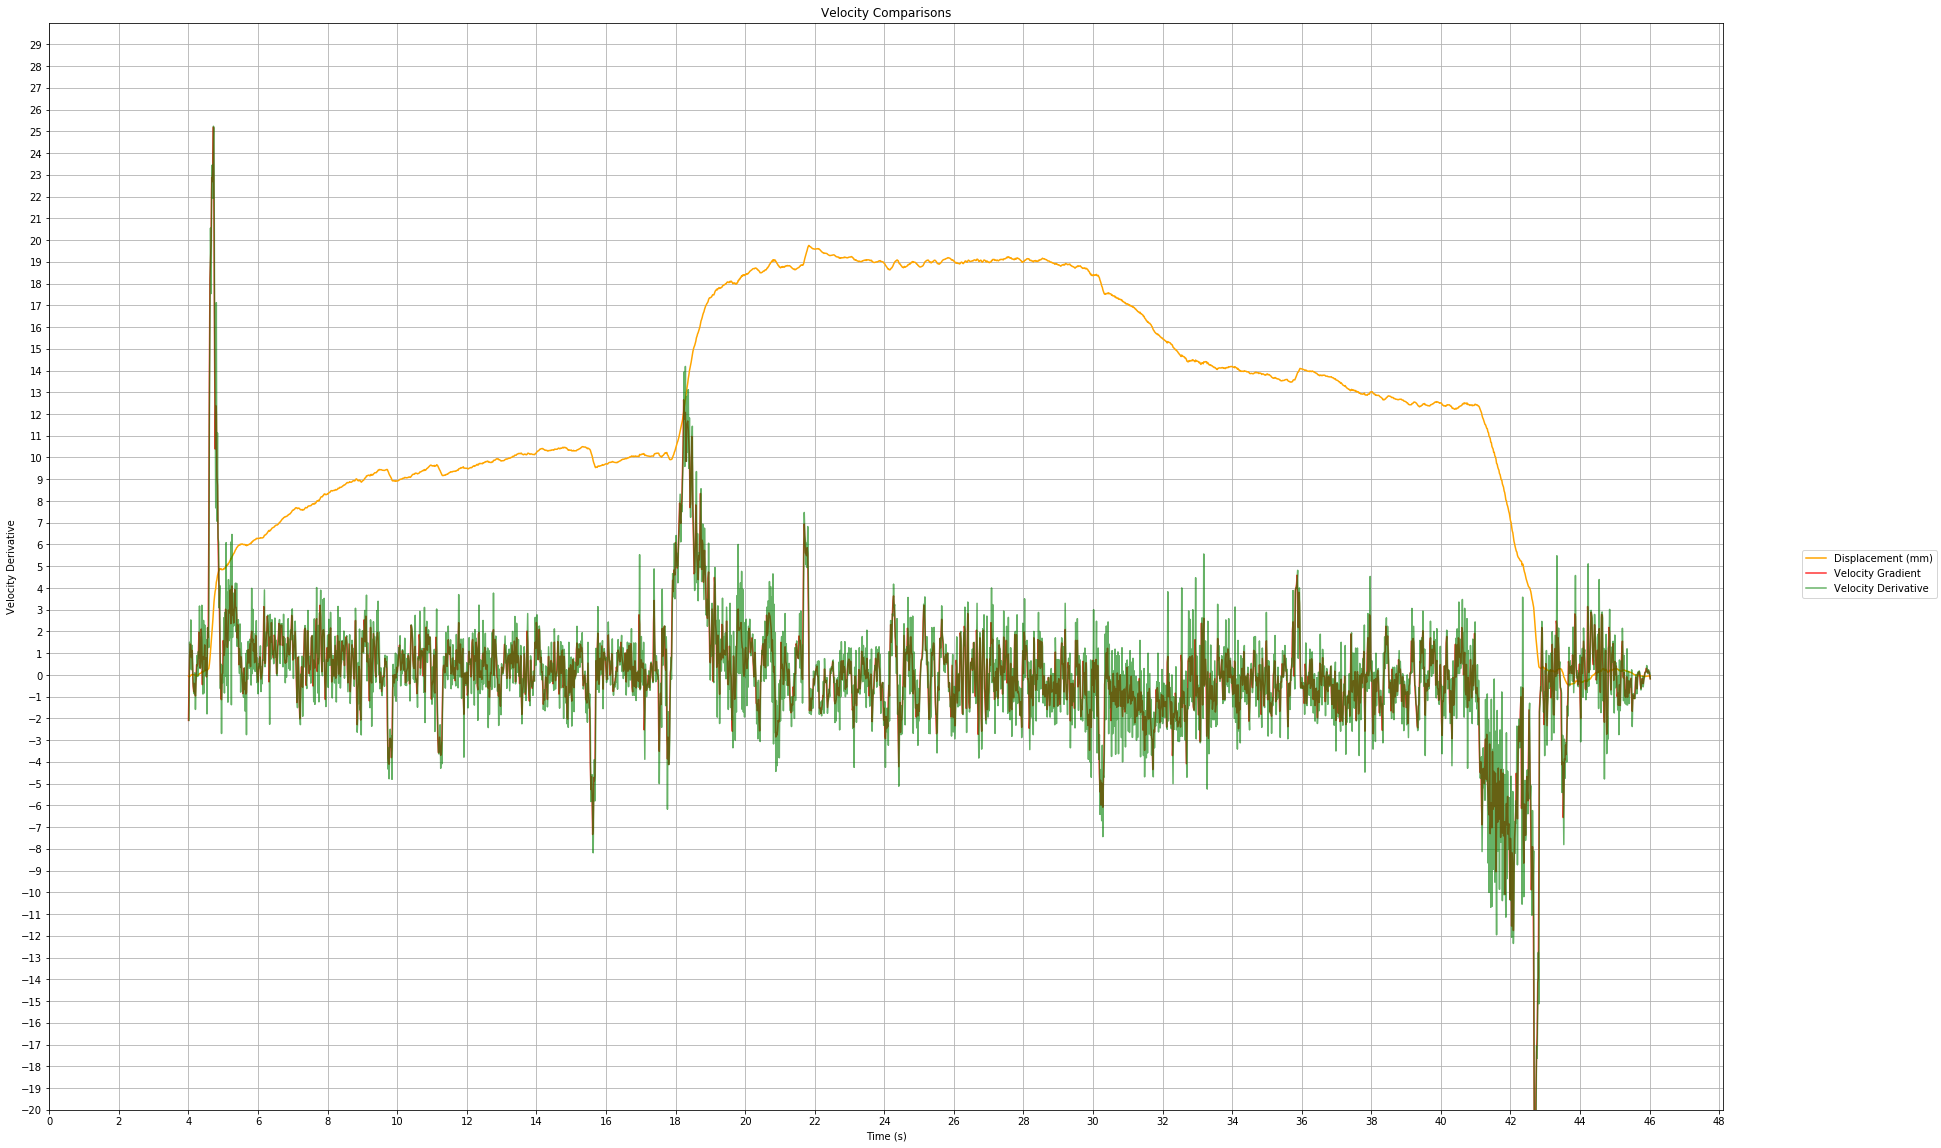

In [26]:
lowLim = -20;
upLim = 30;

for file in files:
    dfOriginal = pd.read_csv(file, encoding = 'utf-8', header = None, names = ["Time (s)", "Displacement (mm)"])
    
    dfOriginal["Velocity Gradient"] = np.gradient(dfOriginal["Displacement (mm)"], dfOriginal["Time (s)"])
    dfOriginal["Velocity Derivative"] = dfOriginal["Displacement (mm)"].diff()/(dfOriginal["Time (s)"].diff())
    
    print(dfOriginal.head())
    
    # Plot stuff
    ax = sns.lineplot(x = "Time (s)", y = "Displacement (mm)", data = dfOriginal, color = "orange")
    ax = sns.lineplot(x = "Time (s)", y = "Velocity Gradient", data = dfOriginal, color = "red", alpha = 0.8)
    ax = sns.lineplot(x = "Time (s)", y = "Velocity Derivative", data = dfOriginal, color = "green", alpha = 0.6)
    
    fig = plt.gcf() # get current figures
    fig.legend(labels = ["Displacement (mm)", "Velocity Gradient", "Velocity Derivative"], loc = "right")
    ax.set_ylim([lowLim, upLim])
    plt.yticks(np.arange(lowLim, upLim, step = 1))
    plt.xticks(np.arange(0, 50, step = 2))
    fig.set_size_inches(30, 20)
    plt.title("Velocity Comparisons")
    plt.grid()
    
    # Save file
    try:
        file = file[:-4] # remove last 4 chars or ".txt"
        fig.savefig(file + "_Velocities" + ".pdf", dpi = 2400)
        dfOriginal.to_csv(file + "_Velocities" + ".csv", index = False)
        print("Figure and CSV saved")
    except PermissionError:
        print("Permission error! Is file open?")
